In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [193]:
df = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Descriptive analysis

In [194]:
df.describe()

# ApplicantIncome, CoapplicantIncome, LoanAmount columns are skewed.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [195]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [196]:
df.shape

(614, 13)

# Univariate analysis

In [197]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


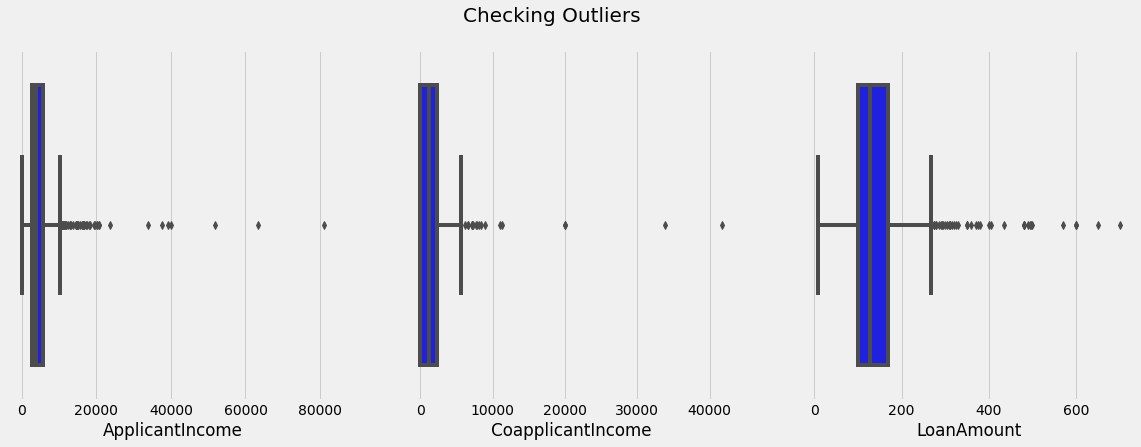

In [198]:
# Checking outliers

plt.figure(figsize=(18,6))
plt.subplot(131)
sns.boxplot(df['ApplicantIncome'],color='b')
plt.subplot(132)
sns.boxplot(df['CoapplicantIncome'],color='b')
plt.subplot(133)
sns.boxplot(df['LoanAmount'],color='b')
plt.suptitle('Checking Outliers',fontsize = 20)
plt.show()

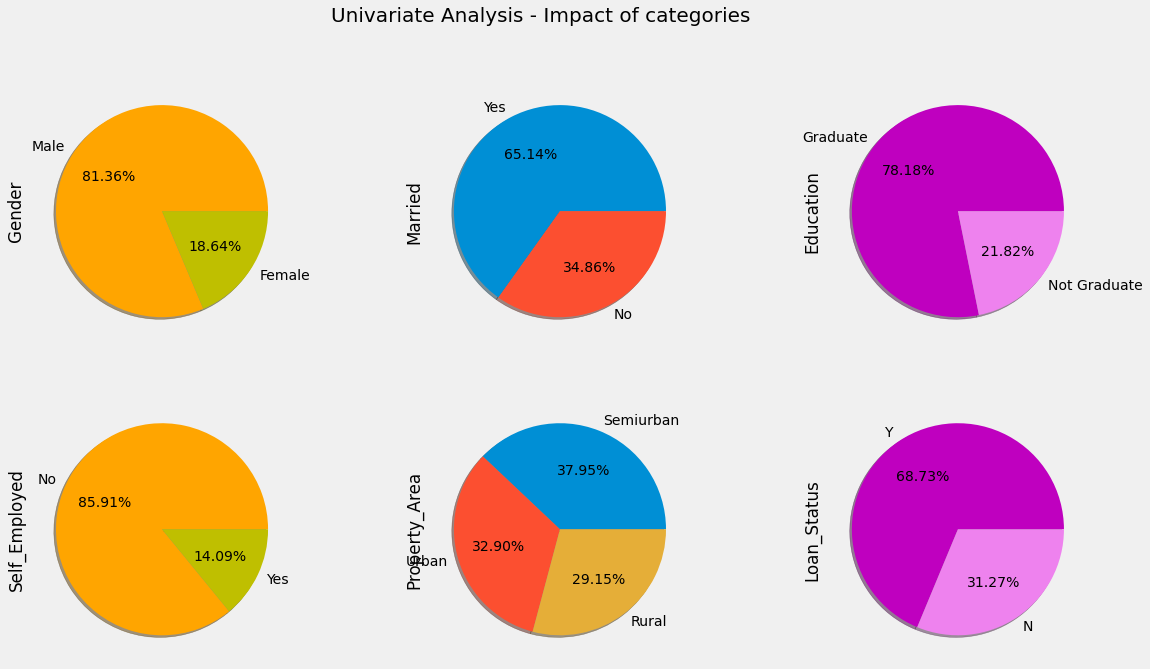

In [199]:
# Impact of categories in variables

plt.figure(figsize=(18,10))
plt.subplot(231)
df['Gender'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['orange','y'])

plt.subplot(232)
df['Married'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(233)
df['Education'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['m','violet'])

plt.subplot(234)
df['Self_Employed'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['orange','y'])

plt.subplot(235)
df['Property_Area'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(236)
df['Loan_Status'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['m','violet'])
plt.suptitle('Univariate Analysis - Impact of categories',fontsize = 20)
plt.show()



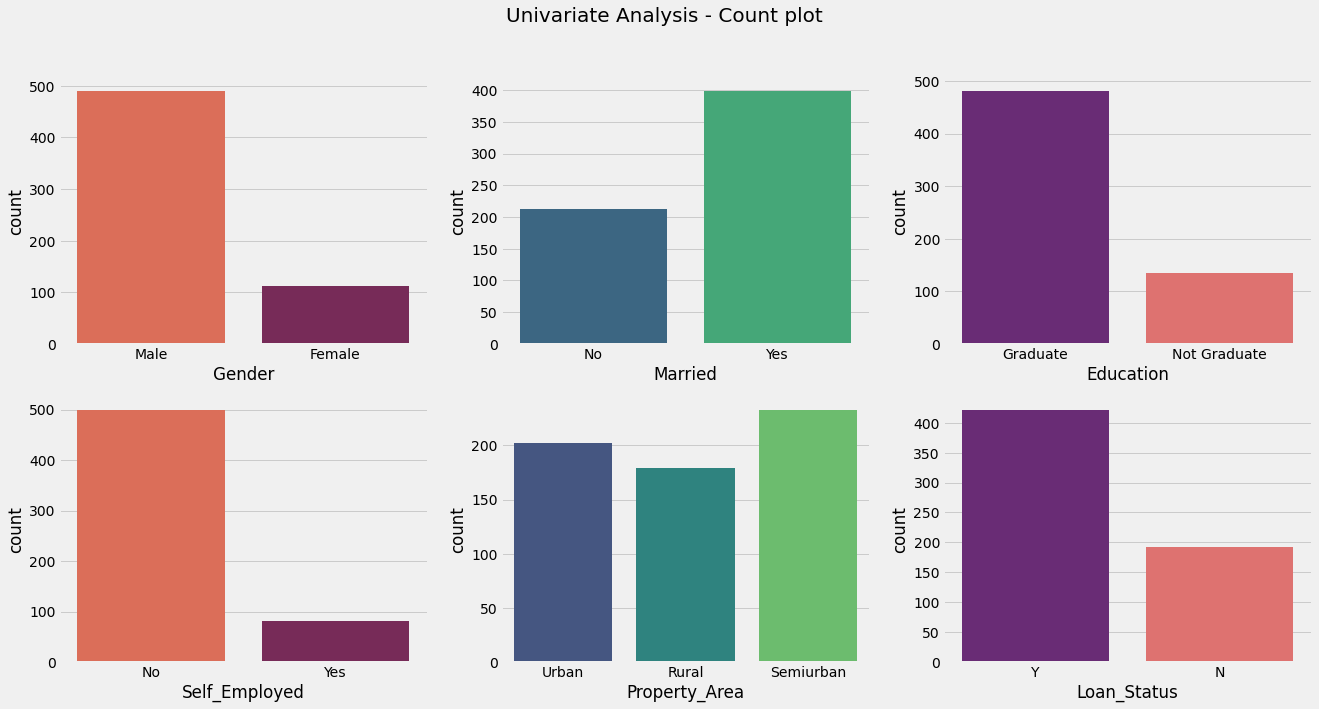

In [200]:
# Checking counts of categories in variables

plt.figure(figsize=(20,10))
plt.subplot(231)
sns.countplot(df['Gender'],palette='rocket_r')

plt.subplot(232)
sns.countplot(df['Married'],palette='viridis')

plt.subplot(233)
sns.countplot(df['Education'],palette='magma')

plt.subplot(234)
sns.countplot(df['Self_Employed'],palette='rocket_r')

plt.subplot(235)
sns.countplot(df['Property_Area'],palette='viridis')

plt.subplot(236)
sns.countplot(df['Loan_Status'],palette='magma')
plt.suptitle('Univariate Analysis - Count plot',fontsize = 20)
plt.show()

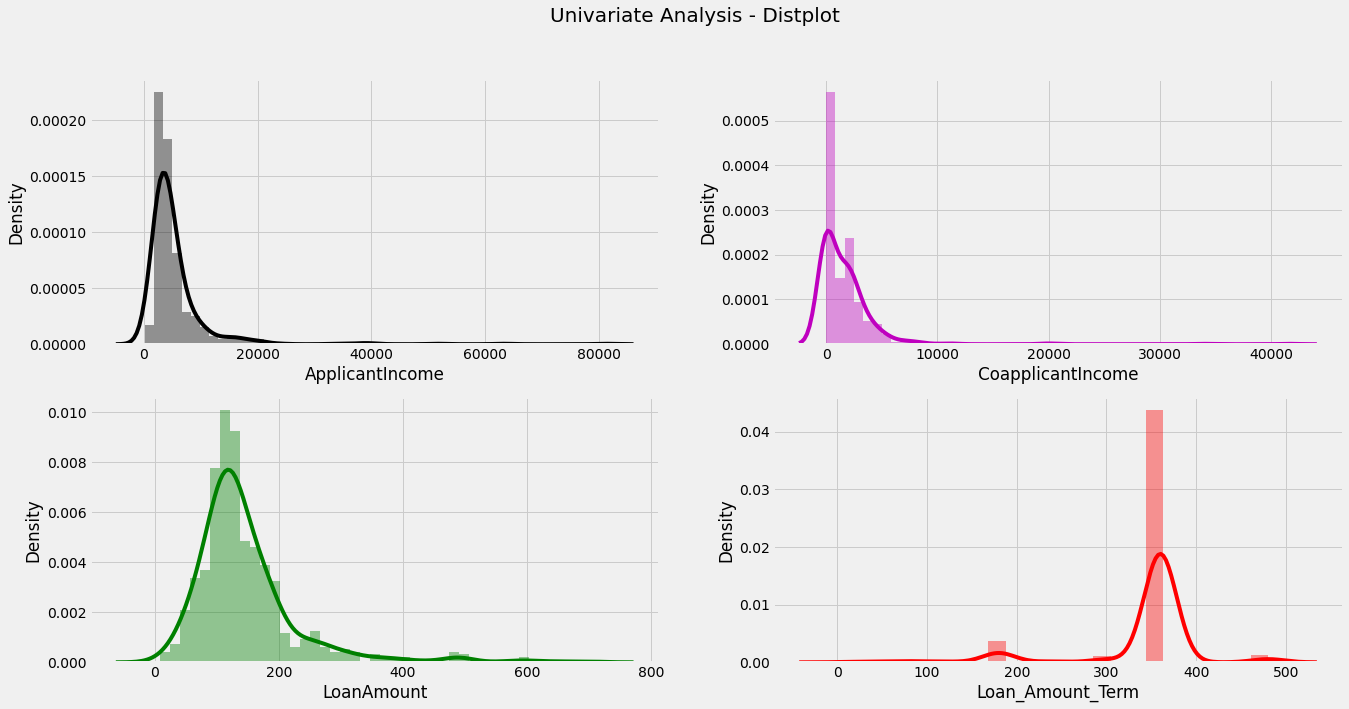

In [201]:
# Checking Distribution of variables

plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df['ApplicantIncome'],color='black')

plt.subplot(222)
sns.distplot(df['CoapplicantIncome'],color='m')

plt.subplot(223)
sns.distplot(df['LoanAmount'],color='g')

plt.subplot(224)
sns.distplot(df['Loan_Amount_Term'],color='r')
plt.suptitle('Univariate Analysis - Distplot',fontsize = 20)
plt.show()

# Bivariate Analysis

In [202]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


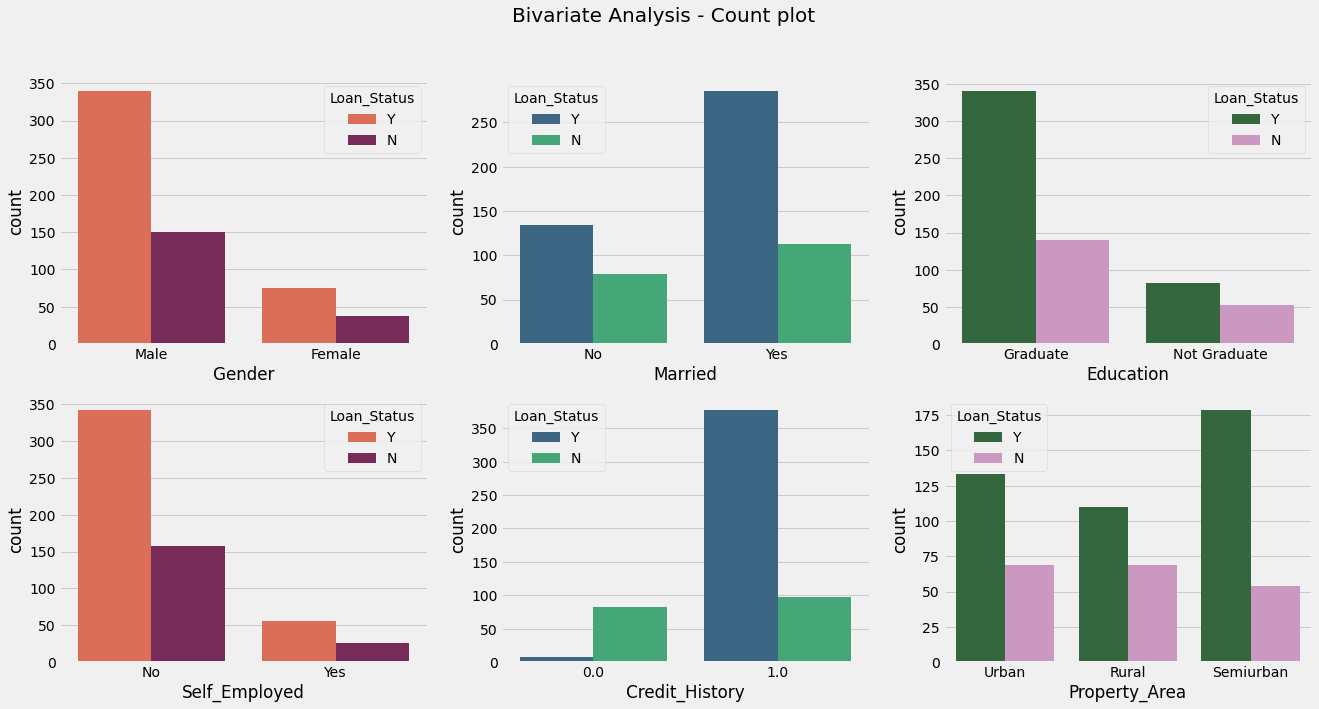

In [203]:
# Comparing variables with Loan status

plt.figure(figsize=(20,10))
plt.subplot(231)
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(232)
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(233)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='cubehelix')

plt.subplot(234)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(235)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(236)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='cubehelix')
plt.suptitle('Bivariate Analysis - Count plot',fontsize = 20)
plt.show()

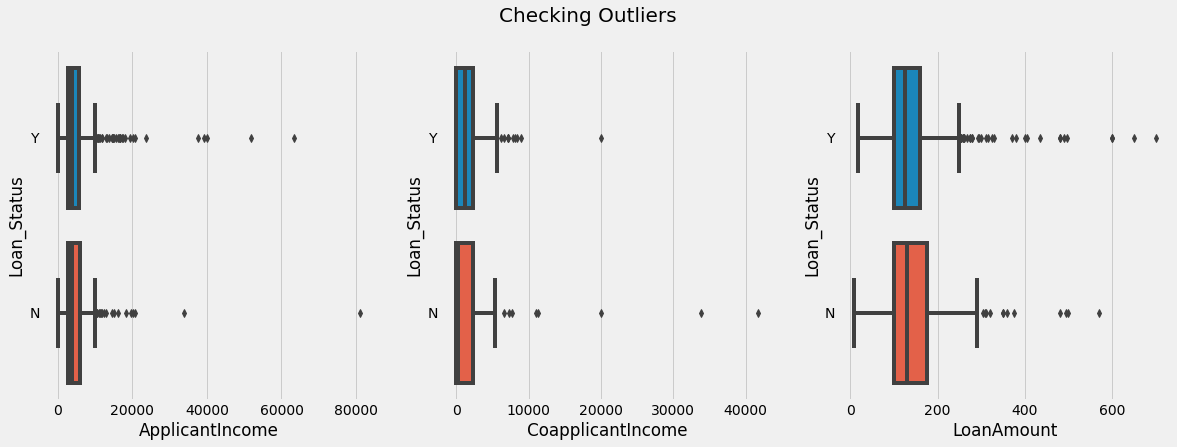

In [204]:
# Impact of ApplicantIncome, CoapplicantIncome and LoanAmount on Loan_Status

plt.figure(figsize=(18,6))
plt.subplot(131)
sns.boxplot(df['ApplicantIncome'],df['Loan_Status'])
plt.subplot(132)
sns.boxplot(df['CoapplicantIncome'],df['Loan_Status'])
plt.subplot(133)
sns.boxplot(df['LoanAmount'],df['Loan_Status'])
plt.suptitle('Checking Outliers',fontsize = 20)
plt.show()

# Data Cleaning

In [205]:
# Removing the outliers from data

print('Before removing outliers {}'.format(df.shape))
df=df[df['ApplicantIncome']<20000]
df=df[df['CoapplicantIncome']<10000]
df=df[df['LoanAmount']<350]
print('After removing outliers {}'.format(df.shape))

Before removing outliers (614, 13)
After removing outliers (565, 13)


In [206]:
df.drop('Loan_ID',axis=1,inplace=True)

# Data Preprocessing

In [207]:
df.isnull().sum()

Gender               11
Married               2
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [208]:
# Assigning values for null values

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [209]:
df.isnull().sum().sum()

0

In [210]:
df.select_dtypes(include='object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


In [211]:
# Converting categorical to numerical

df['Gender']=df['Gender'].replace(('Male','Female'),(2,1))
df['Married']=df['Married'].replace(('Yes','No'),(2,1))
df['Education']=df['Education'].replace(('Graduate','Not Graduate'),(2,1))
df['Self_Employed']=df['Self_Employed'].replace(('No','Yes'),(2,1))
df['Property_Area']=df['Property_Area'].replace(('Semiurban','Urban','Rural'),(3,2,1))
df['Dependents']=df['Dependents'].replace(('3+','2','1','0'),(3,2,1,0))
df['Loan_Status']=df['Loan_Status'].replace(('Y','N'),(2,1))

In [212]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,2,2,1,2,2,4583,1508.0,128.0,360.0,1.0,1,1
2,2,2,0,2,1,3000,0.0,66.0,360.0,1.0,2,2
3,2,2,0,1,2,2583,2358.0,120.0,360.0,1.0,2,2
4,2,1,0,2,2,6000,0.0,141.0,360.0,1.0,2,2
5,2,2,2,2,1,5417,4196.0,267.0,360.0,1.0,2,2


In [213]:
# splitting dependent and independent variable

x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [214]:
# Resampling for balancing the data

sm=SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)

Before Resampling (565,)
After Resampling (790,)


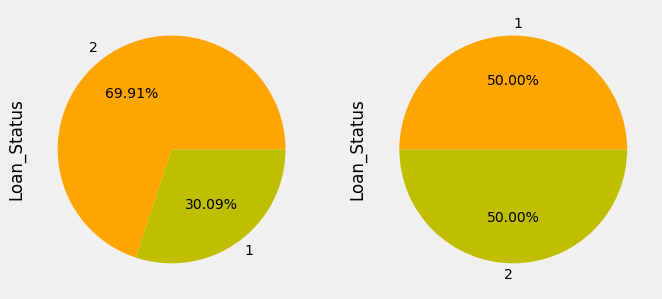

In [215]:
# Visualizing dependent variable

print('Before Resampling {}'.format(y.shape))
print('After Resampling {}'.format(y_sm.shape))
plt.figure(figsize=(10,8))
plt.subplot(121)
y.value_counts().plot(kind='pie',autopct = '%.2f%%',colors=['orange','y'])
plt.subplot(122)
y_sm.value_counts().plot(kind='pie',autopct = '%.2f%%',colors=['orange','y'])
plt.show()

In [216]:
# Train test split

xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,random_state=10)

In [217]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (632, 11)
Shape of ytrain (632,)
Shape of xtest (158, 11)
Shape of ytest (158,)


# Machine Learning Models

In [218]:
# Creating Logistic regression model

def logistic_reg(xtrain,xtest,ytrain,ytest):
    lr=LogisticRegression(solver='liblinear')
    lr.fit(xtrain,ytrain)
    ypred=lr.predict(xtest)
    print('***LogisticRegression***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

In [219]:
# Creating RandomForestClassifier model

def random_forest(xtrain,xtest,ytrain,ytest):
    rf=RandomForestClassifier()
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

In [220]:
# Creating GradientBoostingClassifier model

def g_boosting(xtrain,xtest,ytrain,ytest):
    gb=GradientBoostingClassifier()
    gb.fit(xtrain,ytrain)
    ypred=gb.predict(xtest)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

In [221]:
# Creating GradientBoostingClassifier model

def d_tree(xtrain,xtest,ytrain,ytest):
    dt=DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

In [222]:
# Comparing three models

def compare_model(xtrain,xtest,ytrain,ytest):
    logistic_reg(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    random_forest(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    g_boosting(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    d_tree(xtrain,xtest,ytrain,ytest)

In [223]:
compare_model(xtrain,xtest,ytrain,ytest)

***LogisticRegression***
Confusion matrix
[[60 12]
 [14 72]]
Classification report
              precision    recall  f1-score   support

           1       0.81      0.83      0.82        72
           2       0.86      0.84      0.85        86

    accuracy                           0.84       158
   macro avg       0.83      0.84      0.83       158
weighted avg       0.84      0.84      0.84       158

f1_score : 0.8219178082191781
----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[65  7]
 [12 74]]
Classification report
              precision    recall  f1-score   support

           1       0.84      0.90      0.87        72
           2       0.91      0.86      0.89        86

    accuracy                           0.88       158
   macro avg       0.88      0.88      0.88       158
weighted avg       0.88      0.88      0.88       158

f1_score : 0.87248322147651
-----------------

# Model Improvement

In [235]:
# When compared with all models Random forest model performs well. It is small dataset if more data in dataset the accuracy will be high.

# Trying hyperparameter tunning

from sklearn.model_selection import GridSearchCV, cross_val_score

In [225]:
#Creating Parameters for GridSearchCV

params={'n_estimators':np.arange(100,500,100),
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3]}

params

{'n_estimators': array([100, 200, 300, 400]),
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3]}

In [228]:
# Creating tunning model

rf=RandomForestClassifier()

grid_search=GridSearchCV(rf,params)
grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([100, 200, 300, 400])})

In [229]:
# Finding best parameters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [230]:
# Creating new model with best parameters

rf_gcv=grid_search.best_estimator_
rf_gcv.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       n_estimators=300)

In [234]:
# Analysing performance of tuned model

ypred_gcv=rf_gcv.predict(xtest)
print('***RandomForestClassifier***')
print('Confusion matrix')
print(confusion_matrix(ytest,ypred_gcv))
print('Classification report')
print(classification_report(ytest,ypred_gcv))
print('f1_score : {}'.format(f1_score(ytest,ypred_gcv)))

***RandomForestClassifier***
Confusion matrix
[[57 15]
 [12 74]]
Classification report
              precision    recall  f1-score   support

           1       0.83      0.79      0.81        72
           2       0.83      0.86      0.85        86

    accuracy                           0.83       158
   macro avg       0.83      0.83      0.83       158
weighted avg       0.83      0.83      0.83       158

f1_score : 0.8085106382978724


In [239]:
cv_score=cross_val_score(rf,x,y,cv=5)
print('Score of normal(default) model')
print(cv_score)
print(np.mean(cv_score))
print('-'*100)

cv_score=cross_val_score(rf_gcv,x,y,cv=5)
print('Score of tuned model')
print(cv_score)
print(np.mean(cv_score))

Score of normal(default) model
[0.78761062 0.78761062 0.78761062 0.84955752 0.82300885]
0.8070796460176991
----------------------------------------------------------------------------------------------------
Score of tuned model
[0.81415929 0.80530973 0.77876106 0.86725664 0.84070796]
0.8212389380530973
